# Úvod
Pro analýzu jsem si zvolili datovou sadu statistik ze Spotify.

# Explorativní analýza

Pro každý následující bod je **implementována odpovídající sekce ve zdrojovém kódu** a zjištěné výsledky jsou popsány v dokumentaci:

1. **Průzkum atributů datové sady**: prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.)
2. **Průzkum rozložení hodnot**: prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů, zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. Do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. Použijte různé typy grafů (např. bodový graf, histogram, krabicový nebo houslový graf, graf složený z více podgrafů apod.) a věnujte se různým atributům. V dokumentaci také všechny grafy vhodně okomentujte – popište, jaké informace z nich můžeme vyčíst.
3. **Analýza odlehlých hodnot**: zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty. V dokumentaci popište, jakým způsobem jste odlehlé hodnoty detekovali, a jaké hodnoty jste objevili.
4. **Analýza chybějících hodnot**: proveďte podrobnou analýzu chybějící hodnot. V dokumentaci popište celkový počet chybějících hodnot, počet objektů s více chybějícími hodnotami atd.
5. **Korelační analýza numerických atributů**: proveďte korelační analýzu numerických atributů (k analýze využijte grafy i korelační koeficienty).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

## Průzkum atributů datové sady

Průzkum jednotlivých atributů datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.)

-------------
Načtení datasetu a kontrolní výpis hlavičky pro prvotní přehled.

In [2]:
data = pd.read_csv('./spotify-2023.csv', encoding='latin-1')
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


Jelikož je výpis výše zjednodušený a nejsou zobrazeny všechny atributy, příkaz níže vypisuje všechny sloupce (atributy) přítomné v datasetu.

In [3]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

Zobrazení souhrnnějších informací o datasetu. Už z tohoto výstupu můžeme vidět, že některé položky mají nevyplněnou hodnotu (menší počet non-null hodnot). Zároveň je nevhodné, aby zřejmě numerický atribut (streams, in_deezer_playlists, in_shazam_charts) neměl numerický datový typ. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Zjistíme tedy, které všechny atributy mají kategorický datový typ. Následně provedeme konverzi do patřičného datového typu.

In [5]:
# identifikace kategorickych atributu
categorical_attributes = [col for col in data.columns if data[col].dtype != 'int64']
print(categorical_attributes)

['track_name', 'artist(s)_name', 'streams', 'in_deezer_playlists', 'in_shazam_charts', 'key', 'mode']


In [7]:
data['in_shazam_charts'].fillna(0, inplace=True) # in_shazam_charts ma null hodnoty, ktere vyplnime 0 pro snadnou konverzi
data['in_deezer_playlists'].fillna(0, inplace=True) # in_shazam_charts ma null hodnoty, ktere vyplnime 0 pro snadnou konverzi

attributes_to_convert = ['streams', 'in_deezer_playlists', 'in_shazam_charts']

# Convert each specified column to numeric values
for attribute in attributes_to_convert:
    data[attribute] = pd.to_numeric(data[attribute], errors='coerce', downcast='integer')

# Convert the columns to integer type
data[attributes_to_convert] = data[attributes_to_convert].astype('Int64')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               952 non-null    Int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    Int64 
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    Int64 
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Pro **numerické atributy** vypisujeme základní statistiky, z čehož bychom už potenciálně mohli odhalit nějaké odlehlé hodnoty.

Rozsah hodnot pro rok je od 1930 až po aktuální rok 2023.
Největší počet streamů je 3,7 mld., zatímco nejmenší počet streamů je 2762, průměr streamů je 514 mil. se směrodatnou odchylkou 567 mil., z čehož můžeme usoudit, že počty streamů kolísají o velké hodnoty.

In [8]:
data.describe().loc[['mean', 'std', 'min', 'max']].round(0)

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
mean,2.0,2018.0,6.0,14.0,5200.0,12.0,514137425.0,68.0,52.0,101.0,3.0,48.0,123.0,67.0,51.0,64.0,27.0,2.0,18.0,10.0
std,1.0,11.0,4.0,9.0,7898.0,20.0,566856949.0,86.0,51.0,174.0,6.0,123.0,28.0,15.0,23.0,17.0,26.0,8.0,14.0,10.0
min,1.0,1930.0,1.0,1.0,31.0,0.0,2762.0,0.0,0.0,0.0,0.0,0.0,65.0,23.0,4.0,9.0,0.0,0.0,3.0,2.0
max,8.0,2023.0,12.0,31.0,52898.0,147.0,3703895074.0,672.0,275.0,974.0,58.0,953.0,206.0,96.0,97.0,97.0,97.0,91.0,97.0,64.0


Podobně jako u numerických atributů lze describe funkci využít i pro **kategorické atributy**. Z výstupů můžeme zjistit, kolik hodnot je v datasetu celkově, kolik těchto hodnot je unikátních, zároveň se vypisuje i hodnota nejčastějšího výskytu atributu.

In [ ]:
include = ['object']
data.describe(include = include)

,track_name,artist(s)_name,streams,in_deezer_playlists,in_shazam_charts,key,mode
count,953,953,953,953,903,858,953
unique,943,645,949,348,198,11,2
top,Daylight,Taylor Swift,723894473,0,0,C#,Major
freq,2,34,2,24,344,120,550


## Průzkum rozložení hodnot

Průzkum rozložení hodnot jednotlivých atributů pomocí vhodných grafů se zaměřením na vztahy mezi atributy.

------------
Pro další průzkum hodnot se bude hodit je mít v očekávatelném formátu. Jmenovitě atributy streams, in_deezer_playlists, in_shazam_charts.

In [ ]:
data['in_shazam_charts'].fillna(0, inplace=True) # in_shazam_charts ma null hodnoty, ktere vyplnime 0 pro snadnou konverzi
data['in_deezer_playlists'].fillna(0, inplace=True) # in_shazam_charts ma null hodnoty, ktere vyplnime 0 pro snadnou konverzi

attributes_to_convert = ['streams', 'in_deezer_playlists', 'in_shazam_charts']

# Convert each specified column to numeric values
for attribute in attributes_to_convert:
    data[attribute] = pd.to_numeric(data[attribute], errors='coerce', downcast='integer')

# Convert the columns to integer type
data[attributes_to_convert] = data[attributes_to_convert].astype('Int64')

-------------
Rozložení hodnot numerických atributů

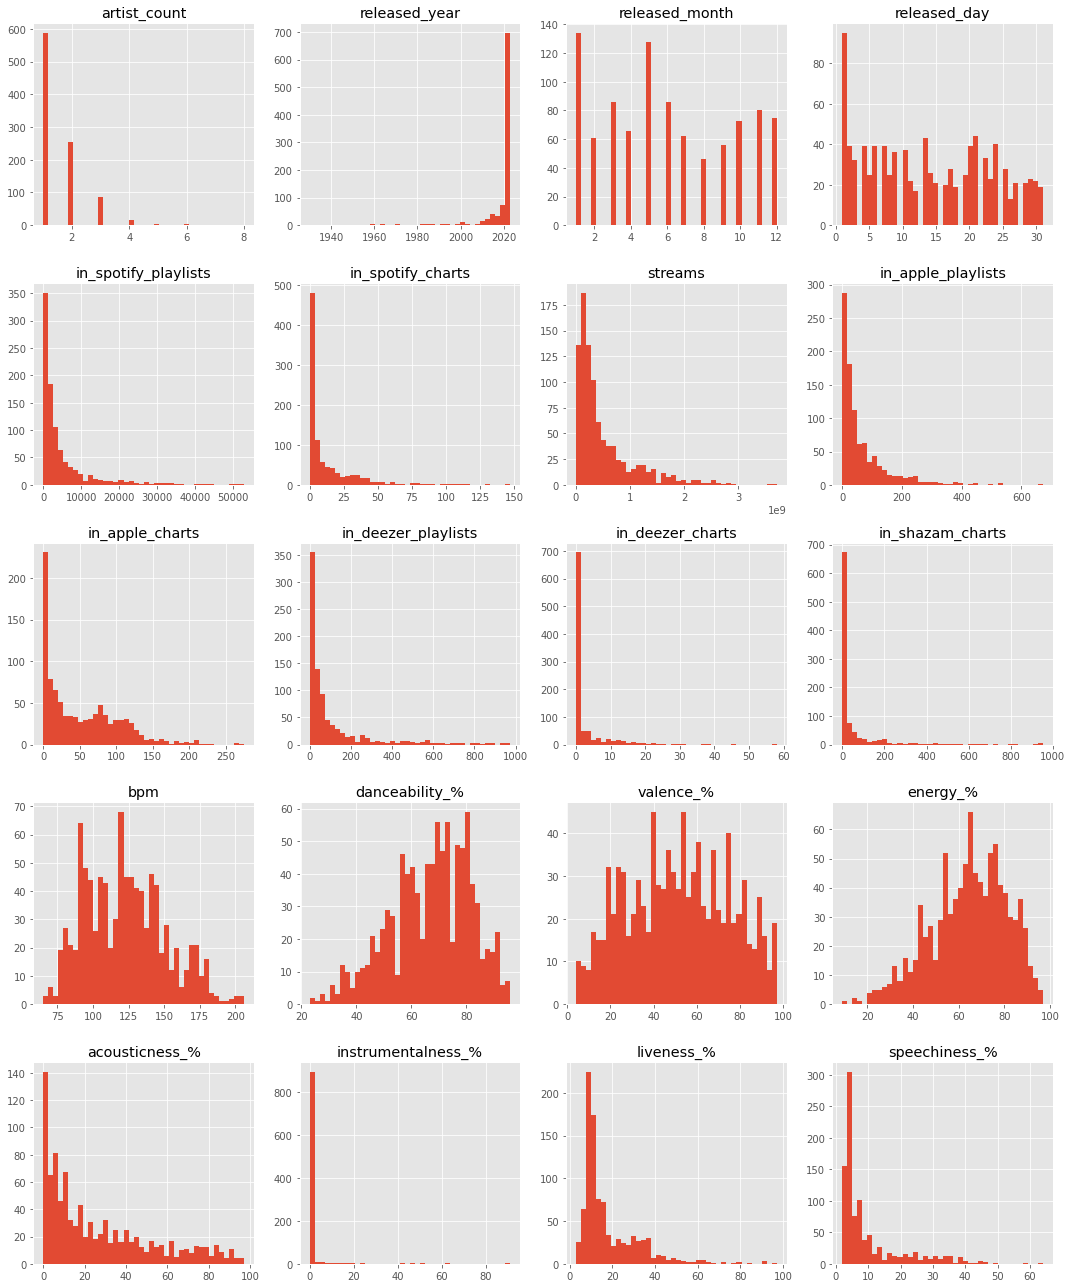

In [ ]:
data.hist(bins=40, figsize=(15, 18)) 
plt.tight_layout()
plt.show()

Nejstreamovanější písničky

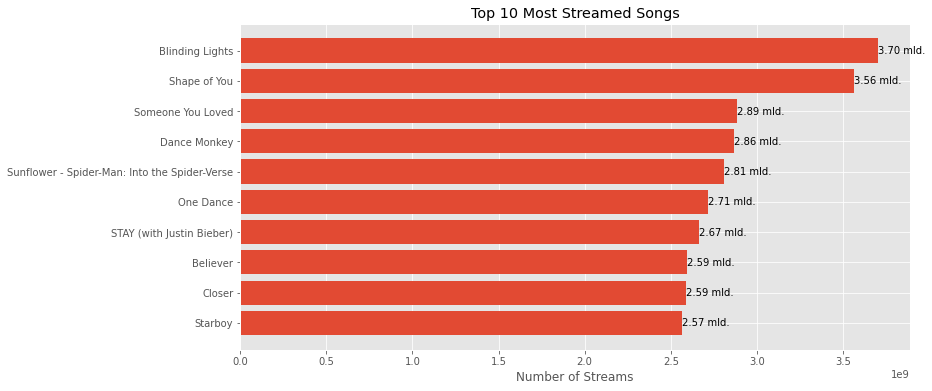

In [19]:
new_data = data.dropna(subset=['streams', 'track_name'])

# Get the 10 most streamed songs
top_10_songs = new_data.nlargest(10, 'streams')[['track_name', 'streams']]
top_10_songs = top_10_songs.sort_values(by='streams', ascending=True)

# Plot the horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_10_songs['track_name'], top_10_songs['streams'])
plt.xlabel('Number of Streams')
plt.title('Top 10 Most Streamed Songs')
for index, value in enumerate(top_10_songs['streams']):
    displayyy = f"{value/1e9:.2f} mld."
    plt.text(value, index, displayyy, ha='left', va='center')

plt.show()

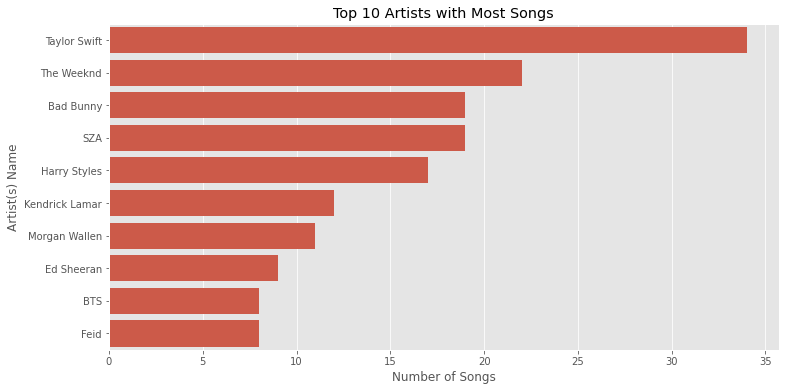

In [18]:
top_artists = data['artist(s)_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.xlabel('Number of Songs')
plt.ylabel('Artist(s) Name')
plt.title('Top 10 Artists with Most Songs')
plt.show()

Tipy, co dělat dál:
1. Explore the trend in the number of streams over time. Consider plotting streams against released_year or released_month.
2. Use box plots to visualize the distribution of numeric attributes grouped by categorical attributes. This can provide insights into how certain categorical features influence the distribution of numeric features.
3. stream count je dulezita hodnota, okolo ktere se budeme chtit tocit

## Analýza odlehlých hodnot

K detekci a analýze odlehlých hodnot lze využít několika přístupů:
1. Vizualizační techniky (krabicové grafy)
2. Numerické výpočty (IQR, identifikace odlehlých hodnot za pomocí z-score normalizace)

U odlehlých hodnot je třeba mít na paměti, že i když se může jednat o nějakou extrémní hodnotu, neimplikuje to nutně to, že by se jednalo o chybnou hodnotu.

In [20]:
data = pd.read_csv('./spotify-2023.csv', encoding='latin-1')

In [21]:
# konverze atributu 
attributes_to_convert = ['streams', 'in_deezer_playlists', 'in_shazam_charts']

# Convert each specified column to numeric values
for attribute in attributes_to_convert:
    data[attribute] = pd.to_numeric(data[attribute], errors='coerce', downcast='integer')

# Convert the columns to integer type
data[attributes_to_convert] = data[attributes_to_convert].astype('Int64')

data['in_shazam_charts'].fillna(0, inplace=True) # in_shazam_charts ma null hodnoty, ktere vyplnime 0 pro snadnou konverzi
data['in_deezer_playlists'].fillna(0, inplace=True) # in_deezer_playlists ma null hodnoty, ktere vyplnime 0 pro snadnou konverzi

### Numerické odlehlé hodnoty

Nejdříve z datasetu na základě datového typu vybereme atributy, které jsou numerické.
Z předešlých fází víme, jaké mají atributy zhruba rozsah. Jelikož chceme nejdříve zobrazit souhrnné krabicové grafy, rozdělíme atributy tak, aby si vzájemně nekazily měřítko.

C:\Users\M\AppData\Local\Temp\ipykernel_10404\2320982286.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=numerical_data_others["in_spotify_playlists"], orient='h', palette='Set2')


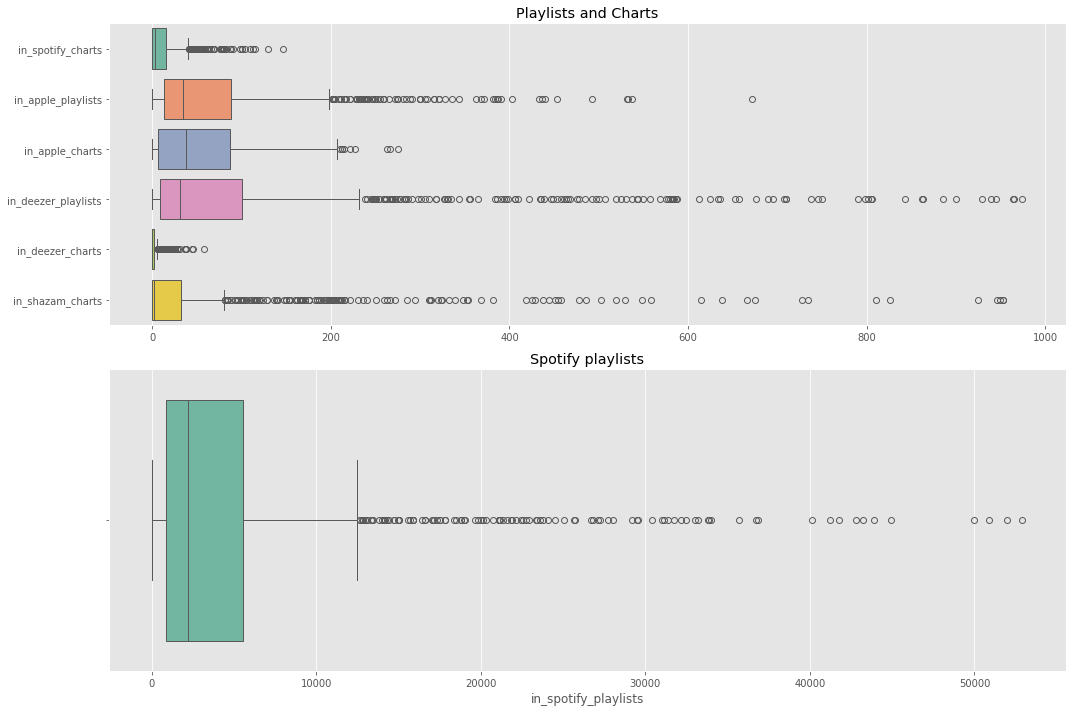

In [56]:
numerical_data = data.select_dtypes(include=['int64'])

numerical_data_playlists_charts = numerical_data[["in_spotify_charts", "in_apple_playlists", "in_apple_charts", "in_deezer_playlists", "in_deezer_charts", "in_shazam_charts"]]
numerical_data_audio_features = numerical_data[["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%"]]
numerical_data_others = numerical_data[["bpm", "streams", "in_spotify_playlists"]]

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(data=numerical_data_playlists_charts, orient='h', palette='Set2')
plt.title('Playlists and Charts')

plt.subplot(2, 1, 2)
sns.boxplot(data=numerical_data_others["in_spotify_playlists"], orient='h', palette='Set2')
plt.title('Spotify playlists')

plt.tight_layout()
plt.show()

Spotify playlisty mají svůj graf, jelikož mají znatelně větší hodnoty oproti ostatním atributům. Ač z grafů vidíme velké množství bodů naznačujících odlehlé hodnoty, nemělo by se jednat o chybná data. Je očekávatelné, že průměrně úspěšných písní je větší množství, a tak populárnější kousky vypadají jako odlehlé hodnoty. Zvláštní hodnoty pozorujeme především u žebříčků na platformě Deezer.

In [48]:
numerical_data_eval = numerical_data[["released_year", "released_month", "released_day", "artist_count"]]
numerical_data_eval.describe()

,released_year,released_month,released_day,artist_count
count,953.000000,953.000000,953.000000,953.000000
mean,2018.238195,6.033578,13.930745,1.556139
std,11.116218,3.566435,9.201949,0.893044
min,1930.000000,1.000000,1.000000,1.000000
25%,2020.000000,3.000000,6.000000,1.000000
50%,2022.000000,6.000000,13.000000,1.000000
75%,2022.000000,9.000000,22.000000,2.000000
max,2023.000000,12.000000,31.000000,8.000000


Hodnoty data vydání a počtu přispívajících interpretů je zbytečné zobrazovat graficky. Z tabulky vidíme, že maximální/minimální hodnoty pro rok, měsíc i den dávají smysl, stejně tak počet interpretů na písničku je v rozumných mezích.

C:\Users\M\AppData\Local\Temp\ipykernel_10404\51189436.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=numerical_data_others["bpm"], orient='h', palette='Set2')


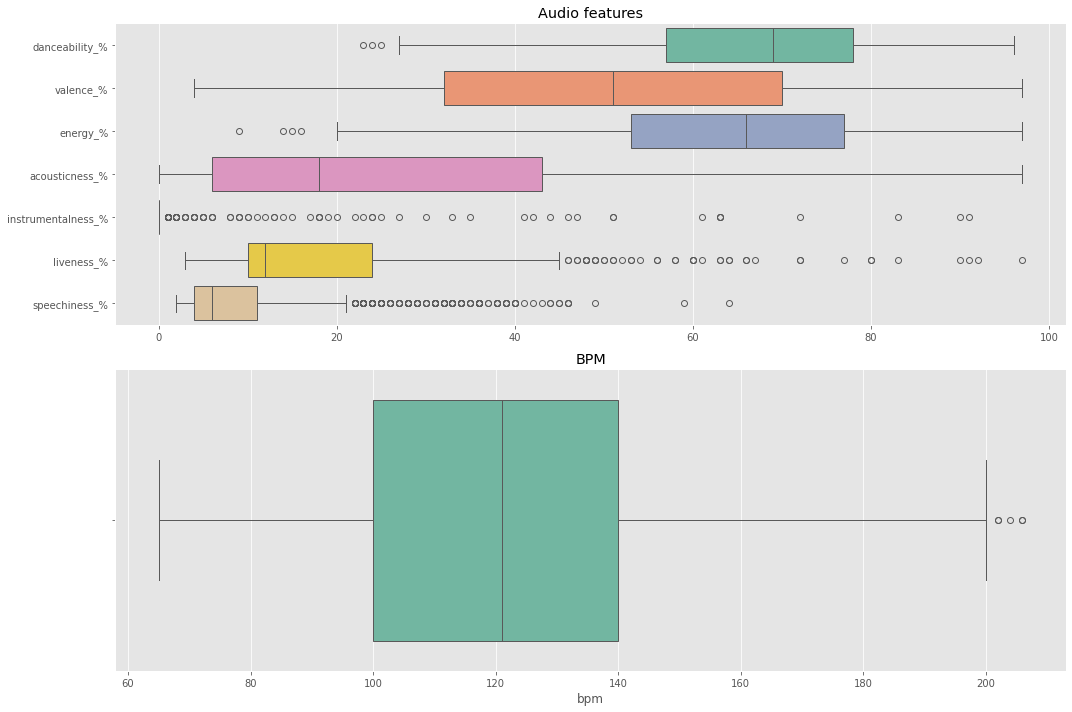

In [57]:
plt.figure(figsize=(15, 10))
# Box plots for audio_features
plt.subplot(2, 1, 1)
sns.boxplot(data=numerical_data_audio_features, orient='h', palette='Set2')
plt.title('Audio features')

# Box plots for others
plt.subplot(2, 1, 2)
sns.boxplot(data=numerical_data_others["bpm"], orient='h', palette='Set2')
plt.title('BPM')

plt.tight_layout()
plt.show()


První složený graf ukazuje jednotlivé aspekty audia v procentech. Rozsah hodnot by tedy měl být v rozmezí 0 až 100, což odpovídá. Zřejmě nejvíce upoutá atribut instrumentalness, který uvádí podíl instrumentální složky v písni. Při manuální analýze objektů, které mají tuto hodnotu vysokou, se potvrdilo, že se skutečně nejedná o chybné hodnoty - tato informace může mimo jiné posloužit i k tomu, že obecně nejstreamovanější hudba je z větší části vokálnější.

Druhý graf pak ukazuje BPM - beats per minute, teda tempo písničky. I zde jsou hodnoty v pořádku.

Text(0.5, 1.0, 'Streams')

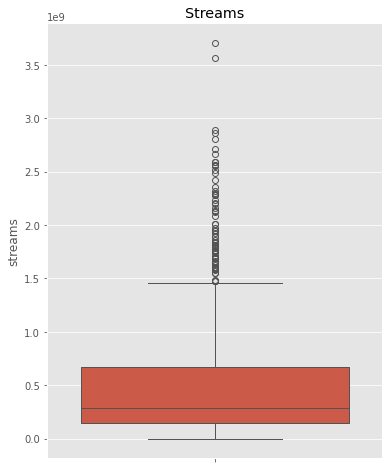

In [63]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=numerical_data_others["streams"])
plt.title('Streams')

I zde jsou hodnoty v pořádku, kdy nejúspěšnější interpreti se svými písněmi dosahují přes 3 mld. poslechů.

### Kategorické odlehlé hodnoty

pro kategoricke udelat histogramy a podivat se na zastoupeni hodnot, identifikovat podezrele

## Analýza chybějících hodnot

In [11]:
data = pd.read_csv('./spotify-2023.csv', encoding='latin-1')

Kód níže lze využít pro kontrolu, jaké unikátní hodnoty pro dané atributy existují (např. jestli místo null není v záznamech třeba ?, který bychom jinak neodhalili). V textovém editoru pak lze projít jednotlivé záznamy.

In [12]:
for column in data.columns:
    print(f"\nValue counts for '{column}':")
    print(data[column].value_counts())


Value counts for 'track_name':
track_name
Daylight                                  2
About Damn Time                           2
SNAP                                      2
Take My Breath                            2
Let It Snow! Let It Snow! Let It Snow!    2
                                         ..
Murder In My Mind                         1
Gangsta's Paradise                        1
CAIRO                                     1
I Love You So                             1
Alone                                     1
Name: count, Length: 943, dtype: int64

Value counts for 'artist(s)_name':
artist(s)_name
Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: count, Length: 645, dtype

Detailnější výpis počtu nulových hodnot atributů.

Atribut ```key``` unikátně charakterizuje danou píseň z hlediska stupnice (viz [dokumentace](https://developer.spotify.com/documentation/web-api/reference/get-audio-features) Spotify). Doplnění této hodnoty na základě jiných hodnot nedává smysl, mazat 95 záznamů by však byla škoda. Dokumentace navrhuje nastavení hodnoty -1, jestliže hodnota atributu byla null. Tato úprava se provede v některé z následujících sekcí.

Atribut ```in_shazam_charts``` udává hodnocení v žebříčcích vyhledávání v aplikaci Shazam (větší číslo indikuje větší oblíbenost/přítomnost v žebříčku). Nepřítomnost této hodnoty může znamenat to, že písnička se do žebříčků vůbec nedostala, proto by dávalo smysl doplnit hodnotu 0.

Z výpisu výše se neodhalily jiné zápisy pro chybějící hodnoty (např. otazníky). Nicméně u atributů pro playlisty a žebříčky se hojně vyskytuje hodnota 0. Předpokládejme, že se nejedná o chybějící hodnotu, nýbrž o informaci o tom, že se daná písnička nedostala do playlistů či žebříčků. Podobně budeme přistupovat k atributu ```in_shazam_charts```, který null hodnoty má a my z nich uděláme právě hodnotu 0 (viz výše).

In [13]:
print(data.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


Pokud bychom hledali překryv v chybějících hodnotách atributů u jednotlivých objektů, kód níže nám udává počet záznamů s alespoň jednou null hodnotou.

In [14]:
rows_with_missing_values = data[data.isnull().any(axis=1)]
count_rows_with_missing_values = len(rows_with_missing_values)

# Display the count
print(f"Number of rows with at least one missing value: {count_rows_with_missing_values}")

Number of rows with at least one missing value: 136


V dalších sekcích s těmito poznatky pracujeme a vhodnou formou chybějící atributy řešíme.

## Korelační analýza numerických atributů

# Příprava datové sady pro dolovací algoritmy

## Odstranění irelevantních atributů

V datové sadě, pokud možno, ponechte jak kategorické, tak i numerické atributy, atributy s chybějícími hodnotami a atributy s odlehlými hodnotami (pokud je původní datová sada obsahuje).

## Odstranění chybějících hodnot

Pro odstranění těchto hodnot využijte alespoň dvě různé metody pro odstranění chybějících hodnot.

V případě chybějících hodnot máme na výběr několik přístupů:
1. Smazat záznam.
2. Manuálně doplnit hodnoty.
3. Automaticky doplnit hodnoty. To u numerického atributu můžeme provést například tak, že za chybějící hodnotu doplníme průměrnou hodnotu tohoto atributu. Aby byla hodnota přesnější, tento průměr může pocházet z nějaké třídy hodnot a ne globálně celého datasetu. Další možností je doplnit null hodnotu nějakou "ne-null" hodnotou, která indikuje, že se atribut byl v originální verzi datasetu neznámý.

Atribut ```key``` unikátně charakterizuje danou píseň z hlediska stupnice (viz [dokumentace](https://developer.spotify.com/documentation/web-api/reference/get-audio-features) Spotify). Doplnění této hodnoty na základě jiných hodnot nedává smysl, mazat 95 záznamů by však byla škoda. Dokumentace navrhuje nastavení hodnoty -1, jestliže hodnota atributu byla null.

Atribut ```in_shazam_charts``` udává hodnocení v žebříčcích vyhledávání v aplikaci Shazam (větší číslo indikuje větší oblíbenost/přítomnost v žebříčku). Nepřítomnost této hodnoty může znamenat to, že písnička se do žebříčků vůbec nedostala, proto by dávalo smysl doplnit hodnotu 0.

In [ ]:
print(data.isnull().sum())

In [ ]:
data['key'] = data['key'].fillna(-1)

attributes_to_convert = ['streams', 'in_deezer_playlists', 'in_shazam_charts']

# Convert each specified column to numeric values
for attribute in attributes_to_convert:
    data[attribute] = pd.to_numeric(data[attribute], errors='coerce', downcast='integer')

# Convert the columns to integer type
data[attributes_to_convert] = data[attributes_to_convert].astype('Int64')

data['in_shazam_charts'].fillna(0, inplace=True) # in_shazam_charts ma null hodnoty, ktere vyplnime 0 pro snadnou konverzi
data['in_deezer_playlists'].fillna(0, inplace=True) # in_deezer_playlists ma null hodnoty, ktere vyplnime 0 pro snadnou konverzi

In [ ]:
print(data.isnull().sum())

Vznikl null záznam u streamů. Při analýze hodnoty před konverzí na datový typ integer se zjistilo, že hodnota streams pro záznam, který má aktuálně null, byla: BPM110KeyAModeMajorDanceability53Valence75Ener... Jednalo se tedy zřejmě o chybnou hodnotu, kterou by analýza odlehlých hodnot odhalila. Tento záznam tedy bude smazán.

In [ ]:
# Display rows with null values in the 'streams' attribute
rows_with_null = data[data['streams'].isnull()]
rows_with_null

In [ ]:
data.dropna(inplace=True)
print(data.isnull().sum())

## Odstranění odlehlých hodnot

Vypořádejte se s odlehlými hodnotami, jsou-li v datové sadě přítomny.

## Diskretizace numerických atributů

Pro jednu variantu datové sady proveďte diskretizaci numerických atributů tak, aby výsledná datová sada byla vhodná pro algoritmy, které vyžadují na vstupu kategorické atributy.

## Transformace kategorických atributů na numerické atributy

Pro druhou variantu datové sady proveďte vhodnou transformaci kategorických atributů na numerické atributy. Dále pak proveďte normalizaci numerických atributů, které má smysl normalizovat. Výsledná datová sada by měla být vhodná pro metody vyžadující numerické vstupy.